Predict Loan Eligibility for Dream Housing Finance company

In [210]:
import pandas as pd
import numpy as np 

In [211]:
data = pd.read_csv('train_ctrUa4K.csv', index_col='Loan_ID')
data.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y


list of all females who are not graduates and got a loan

In [212]:
filter1 = data.loc[(data['Gender']== 'Female') & (data['Education'] == 'Not Graduate') &(data['Loan_Status'] == 'Y')]     
filter1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001155,Female,Yes,0,Not Graduate,No,1928,1644.0,100.0,360.0,1.0,Semiurban,Y
LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
LP001692,Female,No,0,Not Graduate,No,4408,0.0,120.0,360.0,1.0,Semiurban,Y
LP001908,Female,Yes,0,Not Graduate,No,4100,0.0,124.0,360.0,NaN,Rural,Y
LP002300,Female,No,0,Not Graduate,No,1963,0.0,53.0,360.0,1.0,Semiurban,Y
LP002314,Female,No,0,Not Graduate,No,2213,0.0,66.0,360.0,1.0,Rural,Y
LP002407,Female,Yes,0,Not Graduate,Yes,7142,0.0,138.0,360.0,1.0,Rural,Y
LP002489,Female,No,1,Not Graduate,NaN,5191,0.0,132.0,360.0,1.0,Semiurban,Y
LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y


In [213]:
filter1[["Gender","Education","Loan_Status"]]

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


Perform filtering with only 3 columns

In [214]:
filter2 = data.loc[(data['Gender']== 'Female') & (data['Education'] == 'Not Graduate') &(data['Loan_Status'] == 'Y'), ["Gender","Education","Loan_Status"] ] 
filter2    

,Gender,Education,Loan_Status
Loan_ID,,,
LP001155,Female,Not Graduate,Y
LP001669,Female,Not Graduate,Y
LP001692,Female,Not Graduate,Y
LP001908,Female,Not Graduate,Y
LP002300,Female,Not Graduate,Y
LP002314,Female,Not Graduate,Y
LP002407,Female,Not Graduate,Y
LP002489,Female,Not Graduate,Y
LP002502,Female,Not Graduate,Y


Apply Function in Pandas

In [215]:
#Create a new function:
def num_missing(x):
    return sum(x.isnull())


In [216]:
#Applying per column:
print ("Missing values per column:\n")
print (data.apply(num_missing, axis=0)) #axis=0 defines that function is to be applied on each column

Missing values per column:

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [217]:
#Applying per row:
print ("\nMissing values per row:\n")
print (data.apply(num_missing, axis=1).head()) #axis=1 defines that function is to be applied on each row


Missing values per row:

Loan_ID
LP001002    1
LP001003    0
LP001005    0
LP001006    0
LP001008    0
dtype: int64


Imputing missing values using Pandas
‘fillna()’ does it in one go. It is used for updating missing values with the overall mean/mode/median of the column. Let’s impute the ‘Gender’, ‘Married’ and ‘Self_Employed’ columns with their respective modes.

In [218]:
#First we import scipy function to determine the mode
from scipy.stats import mode
mode(data['Gender'])

ModeResult(mode=array(['Male'], dtype=object), count=array([489]))

In [219]:
mode(data['Gender']).mode[0]    #We will take the first one by default 

'Male'

In [220]:
#Impute the values:
data['Gender'].fillna(mode(data['Gender']).mode[0], inplace=True)    # as an example.....will put all missing values as 'male'
data['Married'].fillna(mode(data['Married']).mode[0], inplace=True)
data['Self_Employed'].fillna(mode(data['Self_Employed']).mode[0], inplace=True)

#Now check the #missing values again to confirm:
print (data.apply(num_missing, axis=0))

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


#Pivot Table in Pandas to fill missing values to LoanAmount

In [221]:
#Determine pivot table
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
impute_grps


LoanAmount
Gender Married Self_Employed            
Female No      No             114.691176
               Yes            125.800000
       Yes     No             134.222222
               Yes            282.250000
Male   No      No             129.936937
               Yes            180.588235
       Yes     No             153.882736
               Yes            169.395833

In [222]:
impute_grps.index

MultiIndex([('Female',  'No',  'No'),
            ('Female',  'No', 'Yes'),
            ('Female', 'Yes',  'No'),
            ('Female', 'Yes', 'Yes'),
            (  'Male',  'No',  'No'),
            (  'Male',  'No', 'Yes'),
            (  'Male', 'Yes',  'No'),
            (  'Male', 'Yes', 'Yes')],
           names=['Gender', 'Married', 'Self_Employed'])

In [223]:
len(impute_grps)
impute_grps.shape    # (8, 1)
combinations  = pd.DataFrame(impute_grps.index)
combinations

    


,0
0,"(Female, No, No)"
1,"(Female, No, Yes)"
2,"(Female, Yes, No)"
3,"(Female, Yes, Yes)"
4,"(Male, No, No)"
5,"(Male, No, Yes)"
6,"(Male, Yes, No)"
7,"(Male, Yes, Yes)"


In [224]:
impute_grps.loc[['Female'], ['Yes'], ['Yes']]

,,,LoanAmount
Gender,Married,Self_Employed,
Female,Yes,Yes,282.25


In [225]:
impute_grps.loc[('Male', 'Yes', 'No'), 'LoanAmount']

153.8827361563518

In [226]:
impute_grps.index.levels

FrozenList([['Female', 'Male'], ['No', 'Yes'], ['No', 'Yes']])

In [227]:
data['LoanAmount'].isnull().sum()    # number of missing values

22

In [228]:
data.columns
data[data['Gender'] == 'Male']

mask1 = data[(data['Married']== 'No') & (data['Self_Employed'] == 'No') & (data['Gender'] == 'Male')]
mask1[["Gender","Married","Self_Employed", "LoanAmount"]]

,Gender,Married,Self_Employed,LoanAmount
Loan_ID,,,,
LP001002,Male,No,No,NaN
LP001008,Male,No,No,141.0
LP001029,Male,No,No,114.0
LP001032,Male,No,No,125.0
LP001034,Male,No,No,100.0
...,...,...,...,...
LP002893,Male,No,No,90.0
LP002925,Male,No,No,94.0
LP002940,Male,No,No,110.0


In [229]:
#iterate only through rows with missing LoanAmount
for i,bbb in data.loc[data['LoanAmount'].isnull(),:].iterrows():
    ind = tuple([bbb['Gender'],bbb['Married'],bbb['Self_Employed']])
    data.loc[i,'LoanAmount'] = impute_grps.loc[ind].values[0]
    

In [230]:
data[270: 320]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001888,Female,No,0,Graduate,No,3237,0.000000,30.000000,360.0,1.0,Urban,Y
LP001891,Male,Yes,0,Graduate,No,11146,0.000000,136.000000,360.0,1.0,Urban,Y
LP001892,Male,No,0,Graduate,No,2833,1857.000000,126.000000,360.0,1.0,Rural,Y
LP001894,Male,Yes,0,Graduate,No,2620,2223.000000,150.000000,360.0,1.0,Semiurban,Y
LP001896,Male,Yes,2,Graduate,No,3900,0.000000,90.000000,360.0,1.0,Semiurban,Y
LP001900,Male,Yes,1,Graduate,No,2750,1842.000000,115.000000,360.0,1.0,Semiurban,Y
LP001903,Male,Yes,0,Graduate,No,3993,3274.000000,207.000000,360.0,1.0,Semiurban,Y
LP001904,Male,Yes,0,Graduate,No,3103,1300.000000,80.000000,360.0,1.0,Urban,Y
LP001907,Male,Yes,0,Graduate,No,14583,0.000000,436.000000,360.0,1.0,Semiurban,Y


In [231]:
#Now check the #missing values again to confirm:
data.apply(num_missing, axis=0)

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

cross-tabulation
Test if “Credit_History” is expected to affect the loan status 
computes a frequency table of the factors 

In [232]:
pd.crosstab(data["Credit_History"],data["Loan_Status"],margins=True)    # in absolute numbers

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [233]:
# convert to %:
pd.crosstab(data["Credit_History"],data["Loan_Status"], normalize='index').round(4)*100    #Normalize by dividing all values by the sum of values. 'index' will normalize over each row

Loan_Status,N,Y
Credit_History,,
0.0,92.13,7.87
1.0,20.42,79.58


# 7 – Merge Pandas DataFrames

In [234]:
prop_rates = pd.DataFrame([1000, 5000, 12000], index=['Rural','Semiurban','Urban'],columns=['rates'])
prop_rates

,rates
Rural,1000
Semiurban,5000
Urban,12000


In [235]:
data['Property_Area']

Loan_ID
LP001002        Urban
LP001003        Rural
LP001005        Urban
LP001006        Urban
LP001008        Urban
              ...    
LP002978        Rural
LP002979        Rural
LP002983        Urban
LP002984        Urban
LP002990    Semiurban
Name: Property_Area, Length: 614, dtype: object

In [236]:
#merge this information with the original Pandas dataframe:
data_merged = data.merge(right=prop_rates, how='inner',left_on='Property_Area',right_index=True, sort=False)
#inner: use intersection of keys from both frames; right: use only keys from right frame
data_merged

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,rates
Loan_ID,,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,129.936937,360.0,1.0,Urban,Y,12000
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,12000
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,12000
LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,12000
LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y,12000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
LP002933,Male,No,3+,Graduate,Yes,9357,0.0,292.000000,360.0,1.0,Semiurban,Y,5000
LP002943,Male,No,NaN,Graduate,No,2987,0.0,88.000000,360.0,0.0,Semiurban,N,5000
LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.000000,360.0,1.0,Semiurban,Y,5000


In [195]:
data_merged.pivot_table(values='Credit_History',index=['Property_Area','rates'], aggfunc=len)

,,Credit_History
Property_Area,rates,
Rural,1000,179.0
Semiurban,5000,233.0
Urban,12000,202.0


#  8 – Sorting Pandas DataFrames

In [196]:
data_sorted = data.sort_values(['ApplicantIncome','CoapplicantIncome'], ascending=False)
data_sorted[['ApplicantIncome','CoapplicantIncome']]

,ApplicantIncome,CoapplicantIncome
Loan_ID,,
LP002317,81000,0.0
LP002101,63337,0.0
LP001585,51763,0.0
LP001536,39999,0.0
LP001640,39147,4750.0
...,...,...
LP001644,674,5296.0
LP002603,645,3683.0
LP002949,416,41667.0


#  9 – Plotting (Boxplot & Histogram) with Pandas

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Loan_Status'>

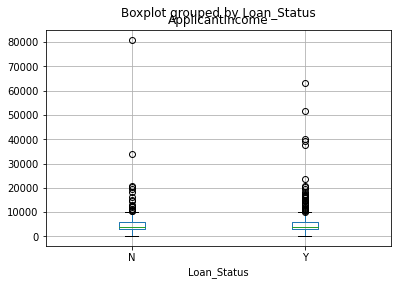

In [197]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot(column="ApplicantIncome",by="Loan_Status")   # compare the distribution of ApplicantIncome by Loan_Status

array([<AxesSubplot:title={'center':'N'}>,
       <AxesSubplot:title={'center':'Y'}>], dtype=object)

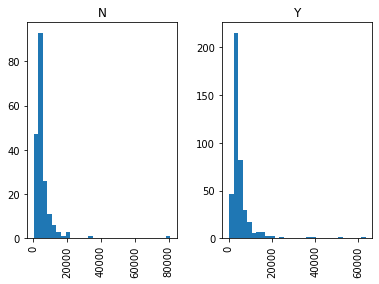

In [198]:
data.hist(column="ApplicantIncome",by="Loan_Status",bins=30)

This shows that income is not a big deciding factor on its own as there is no appreciable difference between the people who received and were denied the loan.

#10 – Cut function for binning
Sometimes numerical values make more sense if clustered together. For example, if we’re trying to model traffic (#cars on road) with time of the day (minutes). The exact minute of an hour might not be that relevant for predicting traffic as compared to actual period of the day like “Morning”, “Afternoon”, “Evening”, “Night”, “Late Night”. Modeling traffic this way will be more intuitive and will avoid overfitting.


In [199]:
#Binning:
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning age:
cut_points = [90,140,190]
labels = ["low","medium","high","very high"]
data["LoanAmount_Bin"] = binning(data["LoanAmount"], cut_points, labels)
pd.value_counts(data["LoanAmount_Bin"], sort=False)

low          104
medium       273
high         146
very high     91
Name: LoanAmount_Bin, dtype: int64

#11 – Coding nominal data using Pandas
Here I’ve defined a generic function which takes in input as a dictionary and codes the values using ‘replace’ function in Pandas.

In [200]:
#Define a generic function using Pandas replace function
def coding(col, codeDict):
  colCoded = pd.Series(col, copy=True)
  for key, value in codeDict.items():
    colCoded.replace(key, value, inplace=True)
  return colCoded
 
#Coding LoanStatus as Y=1, N=0:
print ('Before Coding:')
print (pd.value_counts(data["Loan_Status"]))
data["Loan_Status_Coded"] = coding(data["Loan_Status"], {'N':0,'Y':1})
print ('\nAfter Coding:')
print (pd.value_counts(data["Loan_Status_Coded"]))

Before Coding:
Y    422
N    192
Name: Loan_Status, dtype: int64

After Coding:
1    422
0    192
Name: Loan_Status_Coded, dtype: int64


In [201]:
#12 – Iterating over rows of a Pandas Dataframe


In [202]:
# import pandas package as pd
import pandas as pd
  
# Define a dictionary containing students data
data = {'Name': ['Ankit', 'Amit', 'Aishwarya', 'Priyanka'],
                'Age': [21, 19, 20, 18],
                'Stream': ['Math', 'Commerce', 'Arts', 'Biology'],
                'Percentage': [88, 92, 95, 70]}
  
# Convert the dictionary into DataFrame
df = pd.DataFrame(data, columns = ['Name', 'Age', 'Stream', 'Percentage'])
  
print("Given Dataframe :\n", df)
  
print("\nIterating over rows using index attribute :\n")
  
# iterate through each row and select 
# 'Name' and 'Stream' column respectively.
for ind in df.index:
     print(df['Name'][ind], df['Stream'][ind])

Given Dataframe :
         Name  Age    Stream  Percentage
0      Ankit   21      Math          88
1       Amit   19  Commerce          92
2  Aishwarya   20      Arts          95
3   Priyanka   18   Biology          70

Iterating over rows using index attribute :

Ankit Math
Amit Commerce
Aishwarya Arts
Priyanka Biology


In [203]:
#Method #2 : Using loc[] function of the Dataframe.

print("Given Dataframe :\n", df)
  
print("\nIterating over rows using loc function :\n")
  
# iterate through each row and select 
# 'Name' and 'Age' column respectively.
for i in range(len(df)) :
  print(df.loc[i, "Name"], df.loc[i, "Age"])

Given Dataframe :
         Name  Age    Stream  Percentage
0      Ankit   21      Math          88
1       Amit   19  Commerce          92
2  Aishwarya   20      Arts          95
3   Priyanka   18   Biology          70

Iterating over rows using loc function :

Ankit 21
Amit 19
Aishwarya 20
Priyanka 18


In [204]:
#Method #3 : Using iloc[] function of the DataFrame:
print("\nIterating over rows using iloc function :\n")
  
# iterate through each row and select 
# 0th and 2nd index column respectively.
for i in range(len(df)) :
  print(df.iloc[i, 0], df.iloc[i, 2])


Iterating over rows using iloc function :

Ankit Math
Amit Commerce
Aishwarya Arts
Priyanka Biology


In [205]:
#Method #4 : Using iterrows() method of the Dataframe.
print("\nIterating over rows using iterrows() method :\n")
  
# iterate through each row and select 
# 'Name' and 'Age' column respectively.
for index, row in df.iterrows():
    print (row["Name"], row["Age"])


Iterating over rows using iterrows() method :

Ankit 21
Amit 19
Aishwarya 20
Priyanka 18


In [206]:
#Method #5 : Using itertuples() method of the Dataframe.
print("\nIterating over rows using itertuples() method :\n")
  
# iterate through each row and select 
# 'Name' and 'Percentage' column respectively.
for row in df.itertuples(index = True, name ='Pandas'):
    print (getattr(row, "Name"), getattr(row, "Percentage"))


Iterating over rows using itertuples() method :

Ankit 88
Amit 92
Aishwarya 95
Priyanka 70


In [207]:
#Method #6 : Using apply() method of the Dataframe:
print("\nIterating over rows using apply function :\n")
  
# iterate through each row and concatenate
# 'Name' and 'Percentage' column respectively.
print(df.apply(lambda row: row["Name"] + " " + str(row["Percentage"]), axis = 1))


Iterating over rows using apply function :

0        Ankit 88
1         Amit 92
2    Aishwarya 95
3     Priyanka 70
dtype: object
